In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 17, 'figure.figsize': [15, 7]})
FIGSIZE = (15, 7)

## Data Analysis
### Conclusions
__Pricing:__
1. The predictions accuracies are 100% for 6h, 12h, and 24h. 
2. The set of different electricity pricing is: $[0.21, 0.22, 0.4, 0.5, 0.54]$
3. Statistics:
  - | Electricity value (\$): 0.21 | Incidence (%): 52.705 | Hour occurrence [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 21 22 23] |
  - | Electricity value (\$): 0.22 | Incidence (%): 26.461 | Hour occurrence [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 21 22 23] |
  - | Electricity value (\$): 0.40 | Incidence (%):  1.941 | Hour occurrence [16 17 18 19 20] |
  - | Electricity value (\$): 0.50 | Incidence (%): 13.870 | Hour occurrence [16 17 18 19 20] |
  - | Electricity value (\$): 0.54 | Incidence (%):  5.023 | Hour occurrence [16 17 18 19 20] |

notice that prices above and below $0.4 \$$ do not overlap in daily hours across all year !

__Carbon:__
1. The lowest carbon intensity values are between 23:00 - 06:00
2. The values are oscillatory in $24$ hours time scale, there are no obvious correlations in larger time scales

__Weather:__
1. These are the given weather variables (and their predictions for 6, 12, 24 hours):
- Outdoor Drybulb Temperature [C]
- Relative Humidity [%]
- Diffuse Solar Radiation [W/m2]
- Direct Solar Radiation [W/m2]
2. The predictions accuracies are 100% for 6h, 12h, and 24h.
3. There is no finite small set of values
4. The values are oscillatory in a 24 hours time frame with a variation across seasons
5. There are no non-obvious conclusions (you can checkout the candlestick charts below)

### Electricity Pricing Analysis
#### Prediction Accuracy

In [2]:
pricing = pd.read_csv(filepath_or_buffer="data/citylearn_challenge_2022_phase_1/pricing.csv")
pricing.head()

Electricity Pricing [$]  6h Prediction Electricity Pricing [$]  \
0                     0.22                                   0.22   
1                     0.22                                   0.22   
2                     0.22                                   0.22   
3                     0.22                                   0.22   
4                     0.22                                   0.22   

   12h Prediction Electricity Pricing [$]  \
0                                    0.22   
1                                    0.22   
2                                    0.22   
3                                    0.22   
4                                    0.54   

   24h Prediction Electricity Pricing [$]  
0                                    0.22  
1                                    0.22  
2                                    0.22  
3                                    0.22  
4                                    0.22

Index(['Electricity Pricing [$]', '6h Prediction Electricity Pricing [$]',
       '12h Prediction Electricity Pricing [$]',
       '24h Prediction Electricity Pricing [$]'],
      dtype='object')


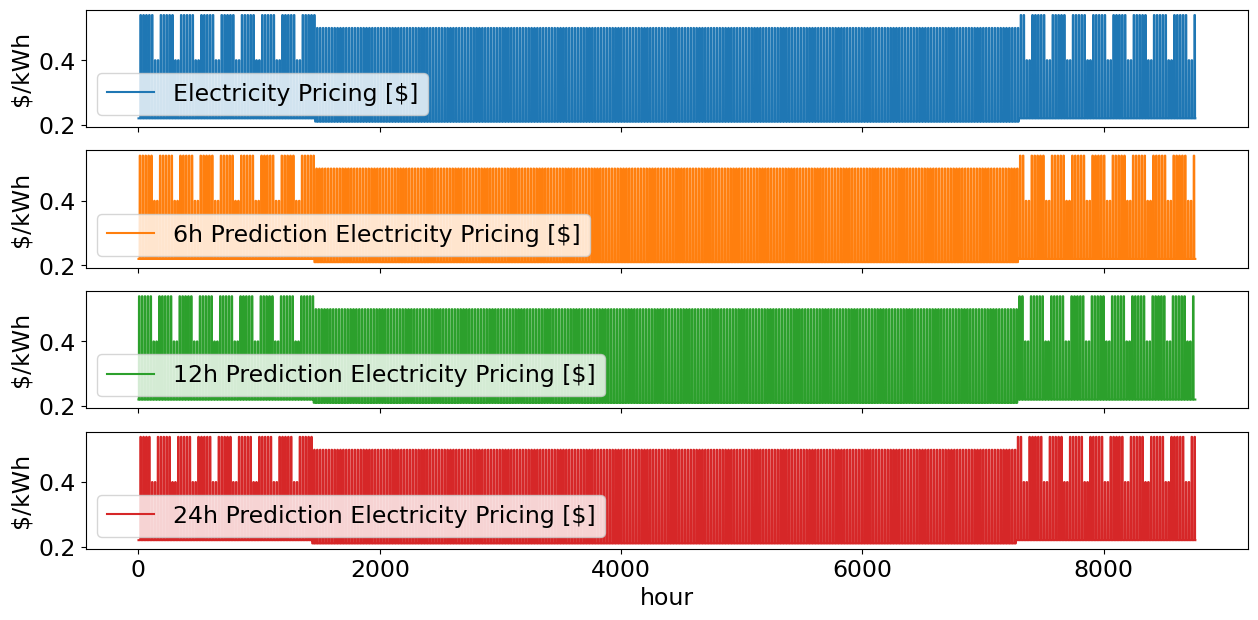

In [3]:
pricing_cols = pricing.columns
print(pricing_cols)
pricing.plot(subplots=True, xlabel="hour", ylabel='$/kWh')
plt.savefig('figures/statistics/electricity_price_year.png')


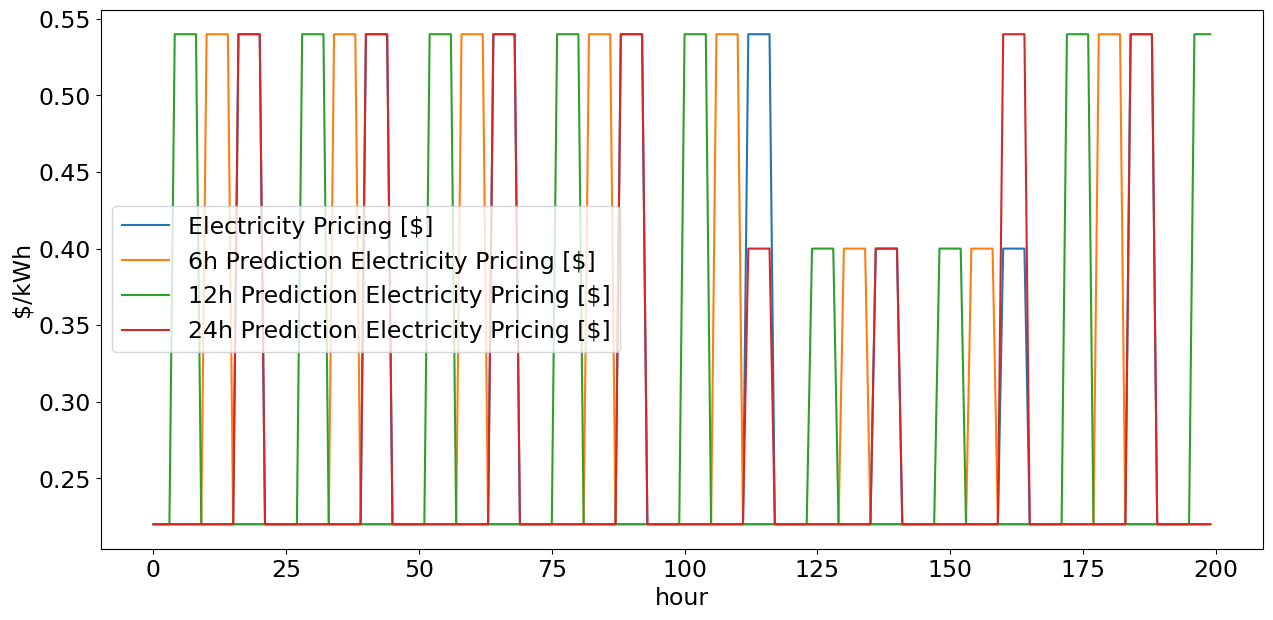

In [4]:
pricing[pricing_cols[0:4]].iloc[0:200].plot(xlabel="hour", ylabel="$/kWh")
plt.savefig('figures/statistics/electricity_price_200.png')

In [5]:
pricing_6h_diff = pricing[pricing_cols[0]].values[6:] - pricing[pricing_cols[1]].values[:-6]
pricing_12h_diff = pricing[pricing_cols[0]].values[12:] - pricing[pricing_cols[2]].values[:-12]
pricing_24h_diff = pricing[pricing_cols[0]].values[24:] - pricing[pricing_cols[3]].values[:-24]

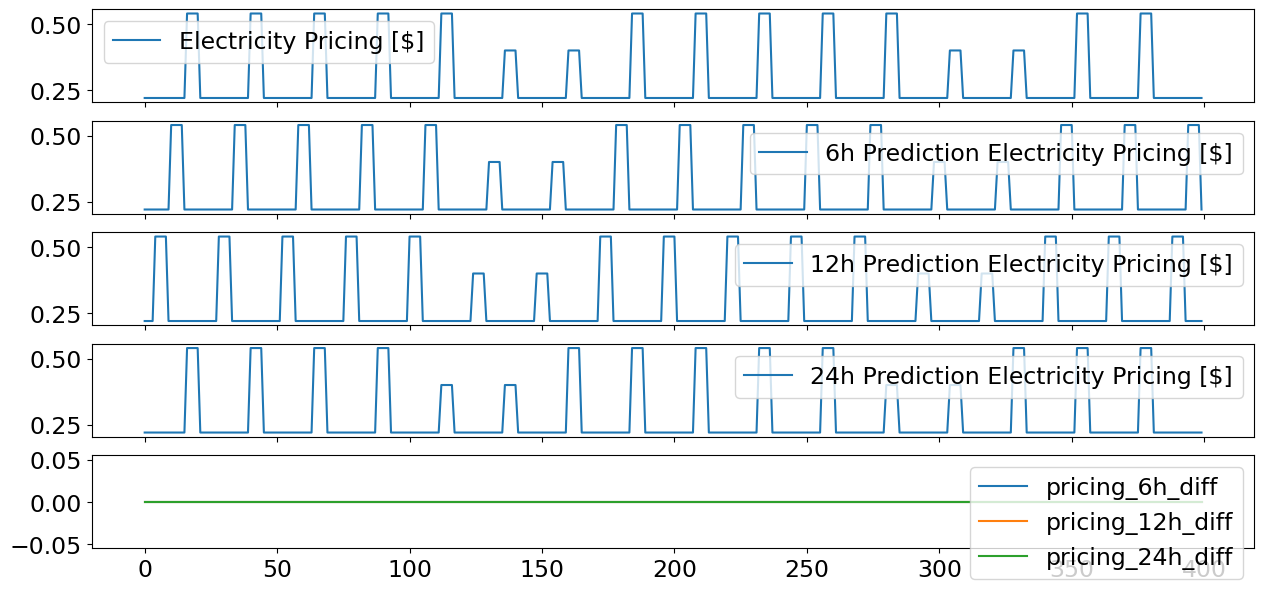

In [6]:
idx_i, idx_f = 0, 400
fig, ax = plt.subplots(5, 1, sharex=True)
ax[0].plot(pricing[pricing_cols[0]].iloc[idx_i:idx_f])
ax[0].legend(pricing_cols[0:1])
ax[1].plot(pricing[pricing_cols[1]].iloc[idx_i:idx_f])
ax[1].legend(pricing_cols[1:2])
ax[2].plot(pricing[pricing_cols[2]].iloc[idx_i:idx_f])
ax[2].legend(pricing_cols[2:3])
ax[3].plot(pricing[pricing_cols[3]].iloc[idx_i:idx_f])
ax[3].legend(pricing_cols[3:4])


ax[4].plot(range(len(pricing_6h_diff[idx_i:idx_f])), pricing_6h_diff[idx_i:idx_f], label='pricing_6h_diff')
ax[4].plot(range(len(pricing_12h_diff[idx_i:idx_f])), pricing_12h_diff[idx_i:idx_f], label='pricing_12h_diff')
ax[4].plot(range(len(pricing_24h_diff[idx_i:idx_f])), pricing_24h_diff[idx_i:idx_f], label='pricing_24h_diff')
ax[4].legend()
plt.show()


In [7]:
pricing_6h_diff_acc = np.sum(pricing_6h_diff == 0) / len(pricing_6h_diff) * 100
pricing_12h_diff_acc = np.sum(pricing_12h_diff == 0) / len(pricing_12h_diff) * 100
pricing_24h_diff_acc = np.sum(pricing_24h_diff == 0) / len(pricing_24h_diff) * 100
print(f"The accuracy of {pricing_cols[1]} is {pricing_6h_diff_acc}%")
print(f"The accuracy of {pricing_cols[2]} is {pricing_12h_diff_acc}%")
print(f"The accuracy of {pricing_cols[3]} is {pricing_24h_diff_acc}%")

The accuracy of 6h Prediction Electricity Pricing [$] is 100.0%
The accuracy of 12h Prediction Electricity Pricing [$] is 100.0%
The accuracy of 24h Prediction Electricity Pricing [$] is 100.0%


#### Pricing Statistics

In [8]:
print(f"The set of different electricity pricing is: {np.unique(pricing[pricing_cols[0]].values)}")

for i, val in enumerate(list(np.unique(pricing[pricing_cols[0]].values))):
    val_percentage = np.sum(pricing[pricing_cols[0]].values == val) / len(pricing[pricing_cols[0]].values) * 100
    val_hours_set = np.unique(np.mod(pricing[pricing_cols[0]].index[pricing[pricing_cols[0]].values == val], 24))
    print("| Electricity value ($): {:4.2f} | Incidence (%): {:6.3f} | Hour occurrence {} |".format(val, val_percentage, val_hours_set))


The set of different electricity pricing is: [0.21 0.22 0.4  0.5  0.54]
| Electricity value ($): 0.21 | Incidence (%): 52.705 | Hour occurrence [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 21 22 23] |
| Electricity value ($): 0.22 | Incidence (%): 26.461 | Hour occurrence [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 21 22 23] |
| Electricity value ($): 0.40 | Incidence (%):  1.941 | Hour occurrence [16 17 18 19 20] |
| Electricity value ($): 0.50 | Incidence (%): 13.870 | Hour occurrence [16 17 18 19 20] |
| Electricity value ($): 0.54 | Incidence (%):  5.023 | Hour occurrence [16 17 18 19 20] |


### Carbon Intensity Analysis

In [9]:
carbon = pd.read_csv(filepath_or_buffer="data/citylearn_challenge_2022_phase_1/carbon_intensity.csv")
carbon.head()

kg_CO2/kWh
0    0.170724
1    0.157319
2    0.154503
3    0.150945
4    0.151820

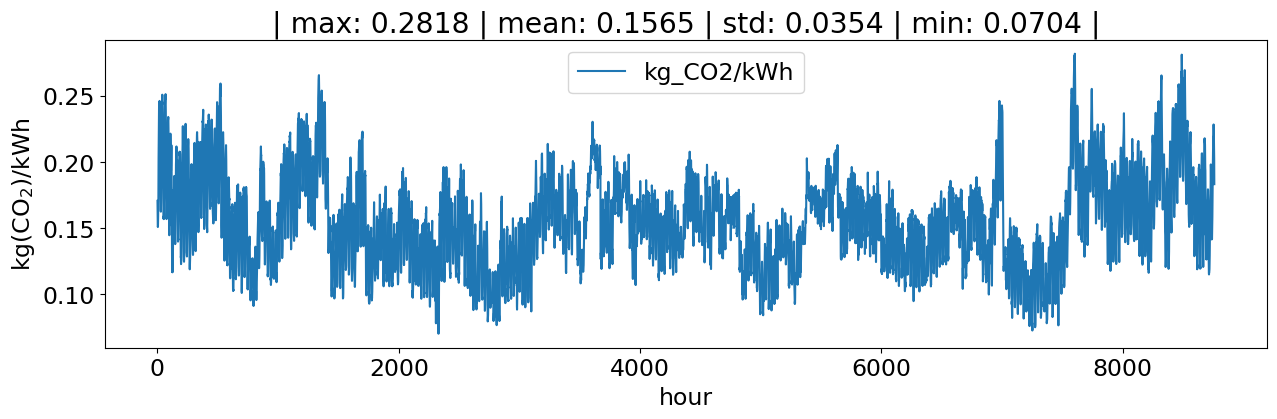

In [10]:
carbon.plot(xlabel="hour", ylabel="kg(CO$_2$)/kWh", figsize=(15, 4), title=f"| max: {carbon.max().round(4).to_numpy()[0]} | mean: {carbon.mean().round(4).to_numpy()[0]} | std: {carbon.std().round(4).to_numpy()[0]} | min: {carbon.min().round(4).to_numpy()[0]} |")
plt.savefig('figures/statistics/carbon_intensity_full.png')

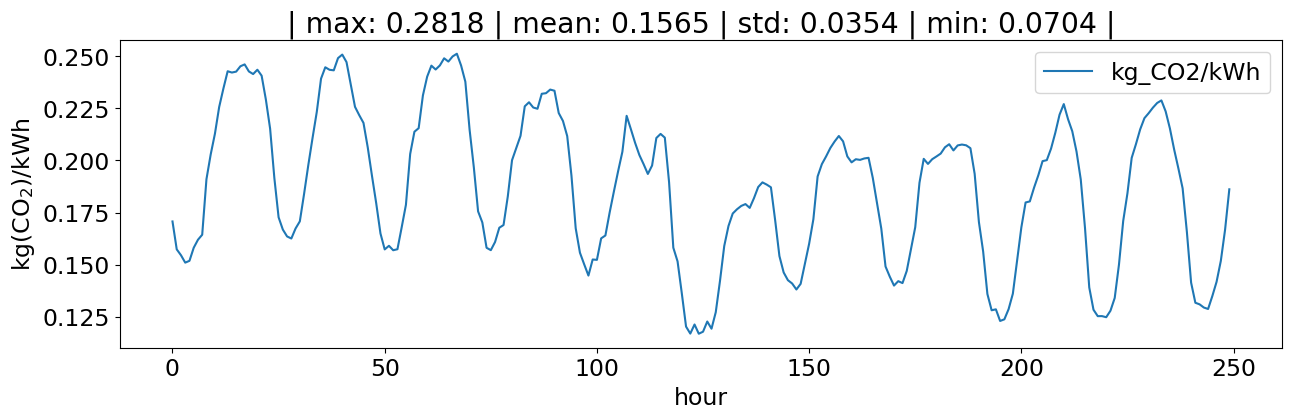

In [11]:
carbon[:250].plot(xlabel="hour", ylabel="kg(CO$_2$)/kWh", figsize=(15, 4), title=f"| max: {carbon.max().round(4).to_numpy()[0]} | mean: {carbon.mean().round(4).to_numpy()[0]} | std: {carbon.std().round(4).to_numpy()[0]} | min: {carbon.min().round(4).to_numpy()[0]} |")
plt.savefig('figures/statistics/carbon_intensity_250.png')

In [12]:
hours = carbon.index.stop
n_unique_values = []
h_max = []
h_min = []
h_mean = []
h_std = []

for h in range(24):
    n_unique_values.append(len(np.unique(carbon.iloc[np.arange(0, hours, 24)].values)))
    h_max.append(carbon.iloc[np.arange(h, hours, 24)].max().round(4).values[0])
    h_min.append(carbon.iloc[np.arange(h, hours, 24)].min().round(4).values[0])
    h_mean.append(carbon.iloc[np.arange(h, hours, 24)].mean().round(4).values[0])
    h_std.append(carbon.iloc[np.arange(h, hours, 24)].std().round(4).values[0])
    print("| Hour: {:3d} | N: {:5d} | Max: {:5.3f} | Min: {:5.3f} | Mean: {:5.3f} | Std: {:5.3f} |".format(
        h, n_unique_values[h], h_max[h], h_min[h], h_mean[h], h_std[h]))

| Hour:   0 | N:   365 | Max: 0.211 | Min: 0.075 | Mean: 0.135 | Std: 0.029 |
| Hour:   1 | N:   365 | Max: 0.209 | Min: 0.070 | Mean: 0.130 | Std: 0.027 |
| Hour:   2 | N:   365 | Max: 0.205 | Min: 0.074 | Mean: 0.128 | Std: 0.027 |
| Hour:   3 | N:   365 | Max: 0.207 | Min: 0.073 | Mean: 0.127 | Std: 0.026 |
| Hour:   4 | N:   365 | Max: 0.214 | Min: 0.074 | Mean: 0.128 | Std: 0.026 |
| Hour:   5 | N:   365 | Max: 0.219 | Min: 0.080 | Mean: 0.135 | Std: 0.026 |
| Hour:   6 | N:   365 | Max: 0.230 | Min: 0.081 | Mean: 0.145 | Std: 0.026 |
| Hour:   7 | N:   365 | Max: 0.221 | Min: 0.087 | Mean: 0.151 | Std: 0.027 |
| Hour:   8 | N:   365 | Max: 0.233 | Min: 0.086 | Mean: 0.156 | Std: 0.028 |
| Hour:   9 | N:   365 | Max: 0.248 | Min: 0.085 | Mean: 0.162 | Std: 0.029 |
| Hour:  10 | N:   365 | Max: 0.258 | Min: 0.087 | Mean: 0.165 | Std: 0.031 |
| Hour:  11 | N:   365 | Max: 0.264 | Min: 0.088 | Mean: 0.167 | Std: 0.033 |
| Hour:  12 | N:   365 | Max: 0.268 | Min: 0.087 | Mean: 0.168 |

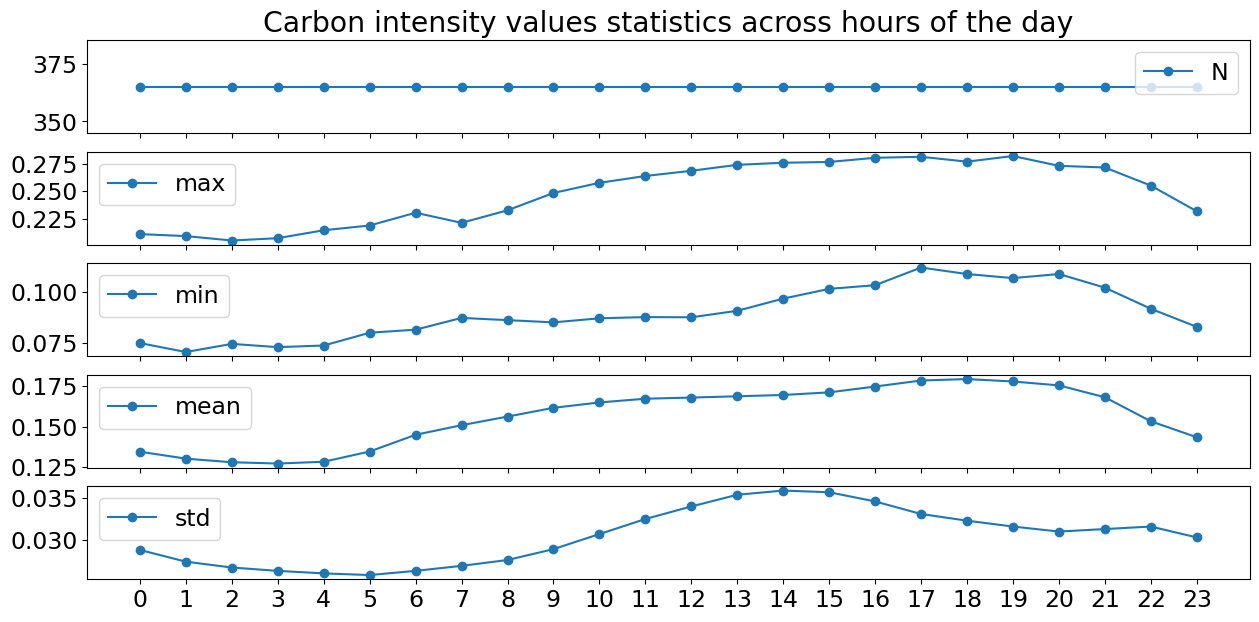

In [13]:
fig, ax = plt.subplots(5, 1, sharex='all')
ax[0].set_title("Carbon intensity values statistics across hours of the day")
ax[0].plot(np.arange(24), n_unique_values, '-o', label='N')
ax[1].plot(np.arange(24), h_max, '-o', label='max')
ax[2].plot(np.arange(24), h_min, '-o', label='min')
ax[3].plot(np.arange(24), h_mean, '-o', label='mean')
ax[4].plot(np.arange(24), h_std, '-o', label='std')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[4].set_xticks(np.arange(24), labels=np.arange(24))
plt.show()

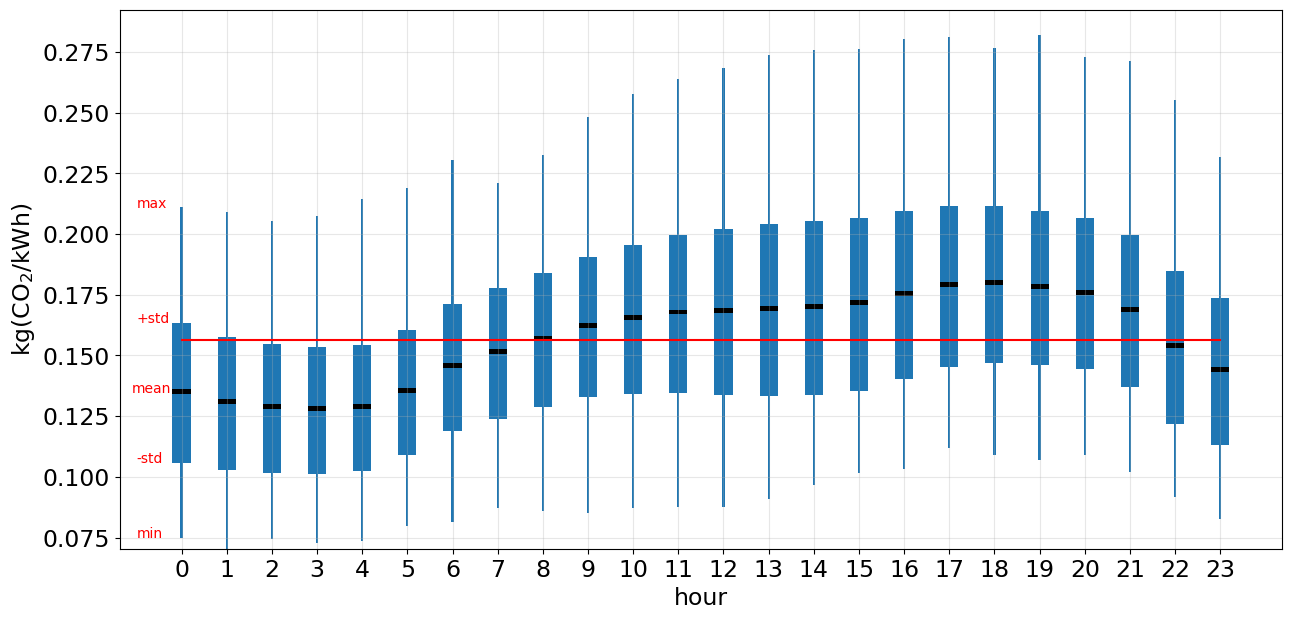

In [14]:
hours = np.arange(24)
width = .4
width2 = .05

plt.figure()
plt.bar(hours, 2*np.array(h_std), width, bottom=np.array(h_mean)-np.array(h_std), color='tab:blue')
plt.bar(hours, np.array(h_max)-np.array(h_min), width2, bottom=np.array(h_min), color='tab:blue')
plt.bar(hours, 0.002, width, bottom=np.array(h_mean)-0.01*np.array(h_std), color='black')
plt.plot(hours, np.ones_like(hours) * np.mean(h_mean), label="mean of means", color="red")
plt.text(-1., h_max[0], "max", fontsize='10', color='red')
plt.text(-1., h_min[0], "min", fontsize='10', color='red')
plt.text(-1.1, h_mean[0], "mean", fontsize='10', color='red')
plt.text(-1., h_mean[0] + h_std[0], "+std", fontsize='10', color='red')
plt.text(-1., h_mean[0] - h_std[0], "-std", fontsize='10', color='red')

plt.xticks(hours)
plt.xlabel('hour')
plt.ylabel("kg(CO$_2$/kWh)")
plt.grid(alpha=0.3)
plt.savefig('figures/statistics/carbon_intensity_candlestick.png')
plt.show()

## Weather Analysis

In [15]:
weather = pd.read_csv(filepath_or_buffer="data/citylearn_challenge_2022_phase_1/weather.csv")
weather.head()

Outdoor Drybulb Temperature [C]  Relative Humidity [%]  \
0                             20.0                   84.0   
1                             20.1                   79.0   
2                             19.7                   78.0   
3                             19.3                   78.0   
4                             18.9                   78.0   

   Diffuse Solar Radiation [W/m2]  Direct Solar Radiation [W/m2]  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   6h Prediction Outdoor Drybulb Temperature [C]  \
0                                           18.3   
1                                           19.4   
2                                           21.1   
3                                           22.2   
4                                           21.7   

   12h Prediction Outdoor Drybulb Temperature [C]  \
0                                            22.8   
1                                            22.8   
2                                            22.2   
3                                            22.8   
4                                            22.2   

   24h Prediction Outdoor Drybulb Temperature [C]  \
0                                            20.0   
1                                            19.4   
2                                            19.4   
3                                            19.4   
4                                            18.9   

   6h Prediction Relative Humidity [%]  12h Prediction Relative Humidity [%]  \
0                                 81.0                                  68.0   
1                                 79.0                                  71.0   
2                                 73.0                                  73.0   
3                                 71.0                                  71.0   
4                                 73.0                                  71.0   

   24h Prediction Relative Humidity [%]  \
0                                  81.0   
1                                  87.0   
2                                  87.0   
3                                  90.0   
4                                  90.0   

   6h Prediction Diffuse Solar Radiation [W/m2]  \
0                                          25.0   
1                                         201.0   
2                                         420.0   
3                                         554.0   
4                                         778.0   

   12h Prediction Diffuse Solar Radiation [W/m2]  \
0                                          964.0   
1                                          966.0   
2                                          683.0   
3                                          522.0   
4                                          444.0   

   24h Prediction Diffuse Solar Radiation [W/m2]  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   6h Prediction Direct Solar Radiation [W/m2]  \
0                                        100.0   
1                                        444.0   
2                                        592.0   
3                                        491.0   
4                                        734.0   

   12h Prediction Direct Solar Radiation [W/m2]  \
0                                         815.0   
1                                         747.0   
2                                         291.0   
3                                         153.0   
4                                         174.0

In [16]:
weather_cols = weather.columns
for i, s in enumerate(weather_cols):
    print(i, ':', s)

0 : Outdoor Drybulb Temperature [C]
1 : Relative Humidity [%]
2 : Diffuse Solar Radiation [W/m2]
3 : Direct Solar Radiation [W/m2]
4 : 6h Prediction Outdoor Drybulb Temperature [C]
5 : 12h Prediction Outdoor Drybulb Temperature [C]
6 : 24h Prediction Outdoor Drybulb Temperature [C]
7 : 6h Prediction Relative Humidity [%]
8 : 12h Prediction Relative Humidity [%]
9 : 24h Prediction Relative Humidity [%]
10 : 6h Prediction Diffuse Solar Radiation [W/m2]
11 : 12h Prediction Diffuse Solar Radiation [W/m2]
12 : 24h Prediction Diffuse Solar Radiation [W/m2]
13 : 6h Prediction Direct Solar Radiation [W/m2]
14 : 12h Prediction Direct Solar Radiation [W/m2]
15 : 24h Prediction Direct Solar Radiation [W/m2]


In [17]:
outdoor_drybulb_temperature_cols = list(np.array(weather_cols)[[0, 4, 5, 6]])
outdoor_drybulb_temperature_data = weather[outdoor_drybulb_temperature_cols]

relative_humidity_cols = list(np.array(weather_cols)[[1, 7, 8, 9]])
relative_humidity_data = weather[relative_humidity_cols]

diffuse_solar_radiation_cols = list(np.array(weather_cols)[[2, 10, 11, 12]])
diffuse_solar_radiation_data = weather[diffuse_solar_radiation_cols]

direct_solar_radiation_cols = list(np.array(weather_cols)[[3, 13, 14, 15]])
direct_solar_radiation_data = weather[direct_solar_radiation_cols]

array([<AxesSubplot:xlabel='hour'>, <AxesSubplot:xlabel='hour'>,
       <AxesSubplot:xlabel='hour'>, <AxesSubplot:xlabel='hour'>],
      dtype=object)

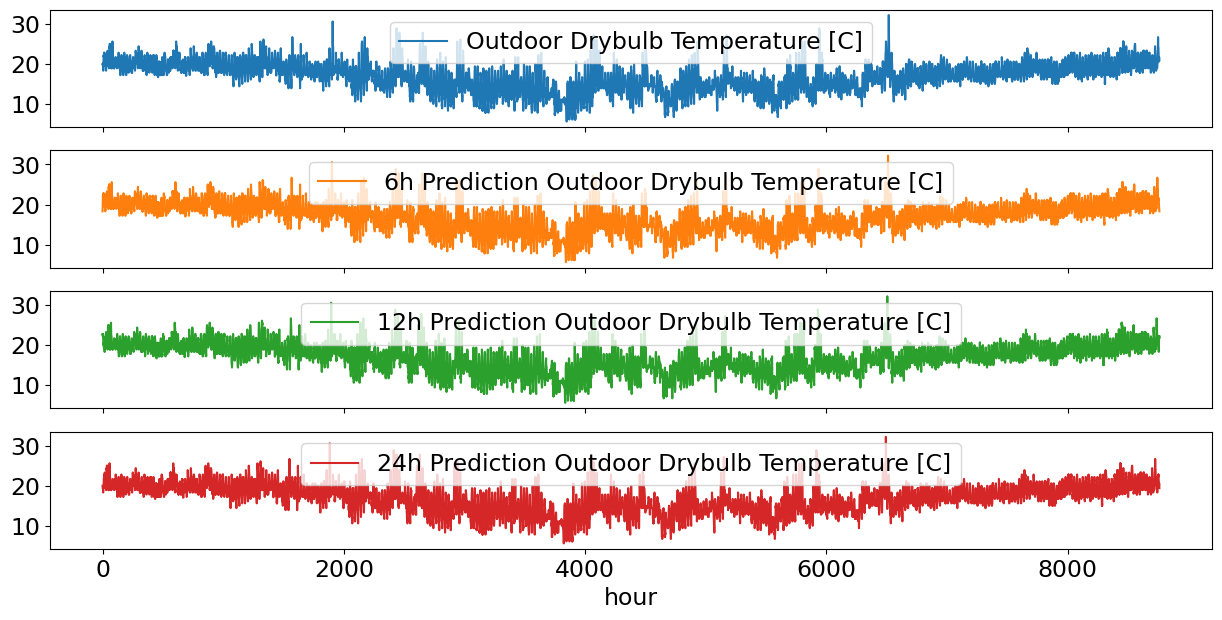

In [18]:
outdoor_drybulb_temperature_data.plot(subplots=True, xlabel="hour")

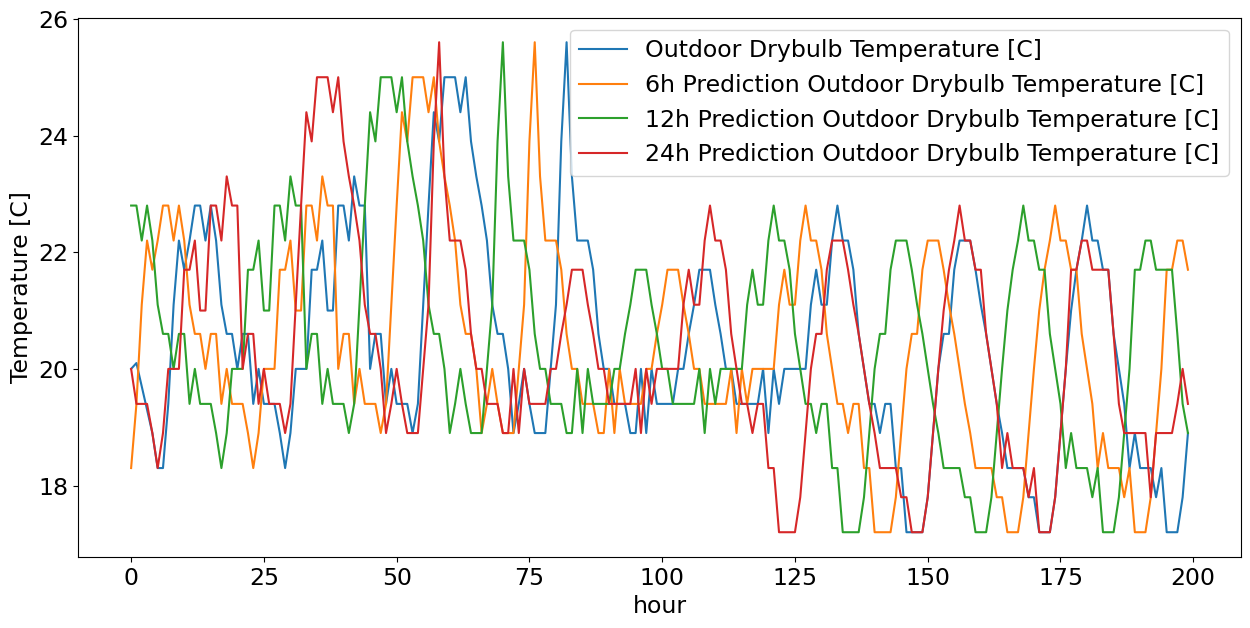

In [19]:
outdoor_drybulb_temperature_data.iloc[0:200].plot(xlabel="hour", ylabel="Temperature [C]")
plt.savefig('figures/statistics/drybulb_prediction_200.png')

In [20]:
def compute_diffs(df):
    cols = df.columns
    df_6h_diff = df[cols[0]].values[6:] - df[cols[1]].values[:-6]
    df_12h_diff = df[cols[0]].values[12:] - df[cols[2]].values[:-12]
    df_24h_diff = df[cols[0]].values[24:] - df[cols[3]].values[:-24]
    
    df_6h_diff_acc = np.sum(df_6h_diff == 0) / len(df_6h_diff) * 100
    df_12h_diff_acc = np.sum(df_12h_diff == 0) / len(df_12h_diff) * 100
    df_24h_diff_acc = np.sum(df_24h_diff == 0) / len(df_24h_diff) * 100
    
    print(f"The accuracy of {cols[1]} is {df_6h_diff_acc}%")
    print(f"The accuracy of {cols[2]} is {df_12h_diff_acc}%")
    print(f"The accuracy of {cols[3]} is {df_24h_diff_acc}%")
    return [df_6h_diff, df_12h_diff, df_24h_diff]

def plot_diffs(df, diffs, idx_i=0, idx_f=400, variable_name=None):
    cols = df.columns
    fig, ax = plt.subplots(5, 1, sharex=True)
    ax[0].plot(df[cols[0]].iloc[idx_i:idx_f])
    ax[0].set_ylabel(cols[0].split(" ")[-1])
    ax[0].legend(cols[0:1])
    ax[1].plot(df[cols[1]].iloc[idx_i:idx_f])
    ax[1].set_ylabel(cols[0].split(" ")[-1])
    ax[1].legend(cols[1:2])
    ax[2].plot(df[cols[2]].iloc[idx_i:idx_f])
    ax[2].set_ylabel(cols[0].split(" ")[-1])
    ax[2].legend(cols[2:3])
    ax[3].plot(df[cols[3]].iloc[idx_i:idx_f])
    ax[3].set_ylabel(cols[0].split(" ")[-1])
    ax[3].legend(cols[3:4])
    
    h = ['6', '12', '24']
    for i in range(3):
        ax[4].plot(range(len(diffs[i][idx_i:idx_f])), diffs[i][idx_i:idx_f], label=variable_name + '_' + h[i] + '_diff')
    ax[4].legend()
    ax[4].set_xlabel('hour')
    plt.show()
    
def collect_n_plot_stats(df, ylabel="", savename=None):
    hours = df.index.stop
    n_unique_values = []
    h_max = []
    h_min = []
    h_mean = []
    h_std = []

    for h in range(24):
        n_unique_values.append(len(np.unique(df.iloc[np.arange(0, hours, 24)].values)))
        h_max.append(df.iloc[np.arange(h, hours, 24)].max().round(4).values[0])
        h_min.append(df.iloc[np.arange(h, hours, 24)].min().round(4).values[0])
        h_mean.append(df.iloc[np.arange(h, hours, 24)].mean().round(4).values[0])
        h_std.append(df.iloc[np.arange(h, hours, 24)].std().round(4).values[0])
        
        
    hours = np.arange(24)
    width = .4
    width2 = .05
    
    plt.figure()
    plt.title(df.columns[0] + " values candlestick chart across hours of the day")
    plt.bar(hours, 2*np.array(h_std), width, bottom=np.array(h_mean)-np.array(h_std), color='tab:blue')
    plt.bar(hours, np.array(h_max)-np.array(h_min), width2, bottom=np.array(h_min), color='tab:blue')
    plt.bar(hours, 0.01*h_mean[0], width, bottom=np.array(h_mean)-0.001*np.array(h_mean), color='black')
    if min(h_mean)!=0:
        plt.text(-1., h_max[0], "max", fontsize='10', color='red')
        plt.text(-1., h_min[0], "min", fontsize='10', color='red')
        plt.text(-1.1, h_mean[0], "mean", fontsize='10', color='red')
        plt.text(-1., h_mean[0] + h_std[0], "+std", fontsize='10', color='red')
        plt.text(-1., h_mean[0] - h_std[0], "-std", fontsize='10', color='red')
    plt.xticks(hours)
    plt.xlabel('hour')
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    if savename is not None:
        plt.savefig('figures/statistics/' + savename + '.png')
    plt.show()
    
    return [n_unique_values, h_max, h_min, h_mean, h_std]


### Verifying Prediction Values for Weather data

#### Outdoor Drybulb Temperature [C]

The accuracy of 6h Prediction Outdoor Drybulb Temperature [C] is 100.0%
The accuracy of 12h Prediction Outdoor Drybulb Temperature [C] is 100.0%
The accuracy of 24h Prediction Outdoor Drybulb Temperature [C] is 100.0%


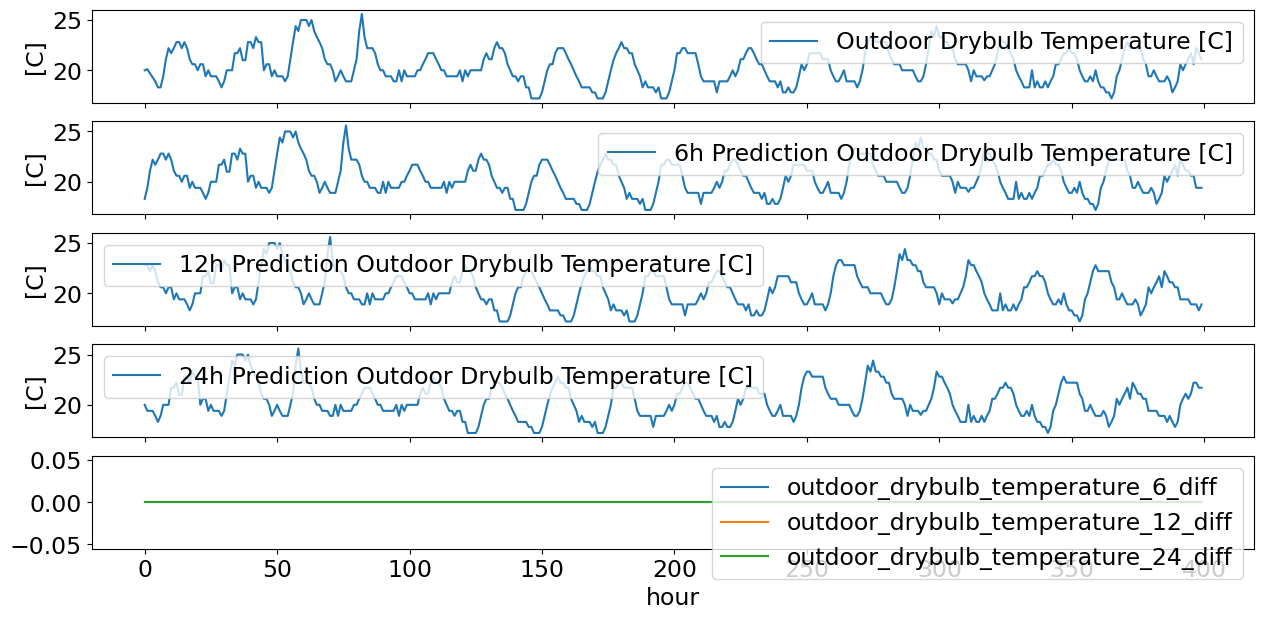

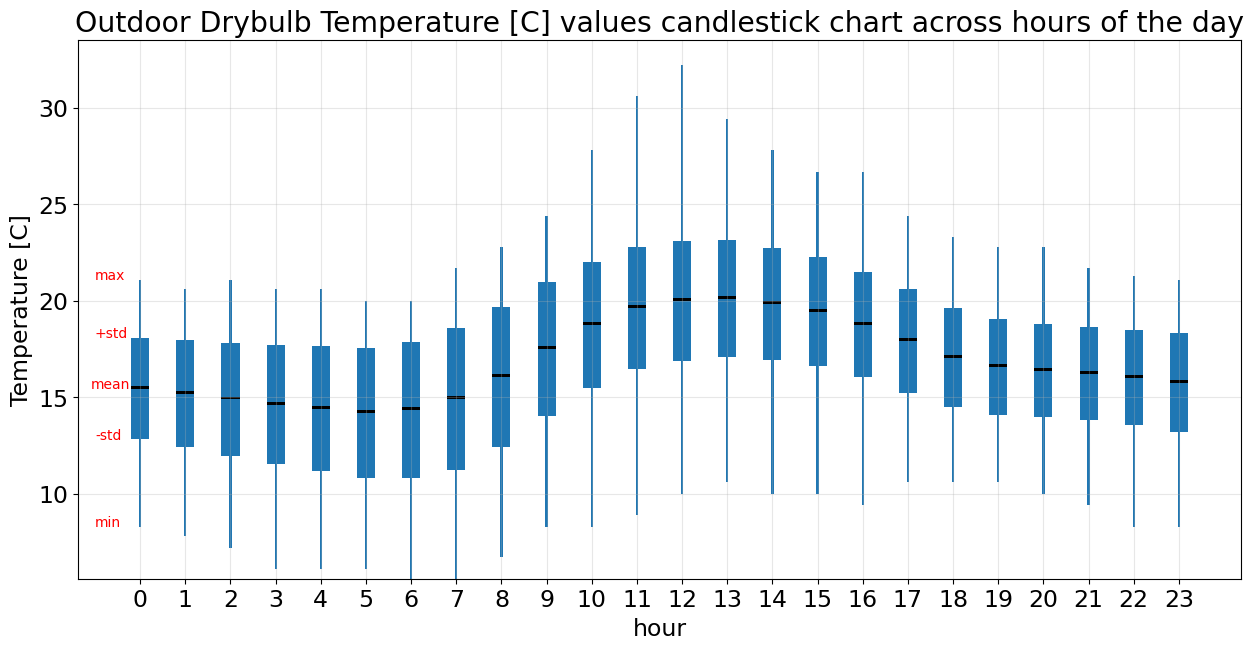

In [21]:
# compute diffs
outdoor_drybulb_temperature_diffs = compute_diffs(outdoor_drybulb_temperature_data)

# plot diffs
plot_diffs(outdoor_drybulb_temperature_data, outdoor_drybulb_temperature_diffs, 
           idx_i=0, idx_f=400, variable_name='outdoor_drybulb_temperature')

# compute and plot stats (candlestick chart)
outdoor_drybulb_temperature_stats = collect_n_plot_stats(outdoor_drybulb_temperature_data, 
                                                         ylabel='Temperature [C]', savename="drybulb_candlestick")

#### Relative Humidity [%]

The accuracy of 6h Prediction Relative Humidity [%] is 100.0%
The accuracy of 12h Prediction Relative Humidity [%] is 100.0%
The accuracy of 24h Prediction Relative Humidity [%] is 100.0%


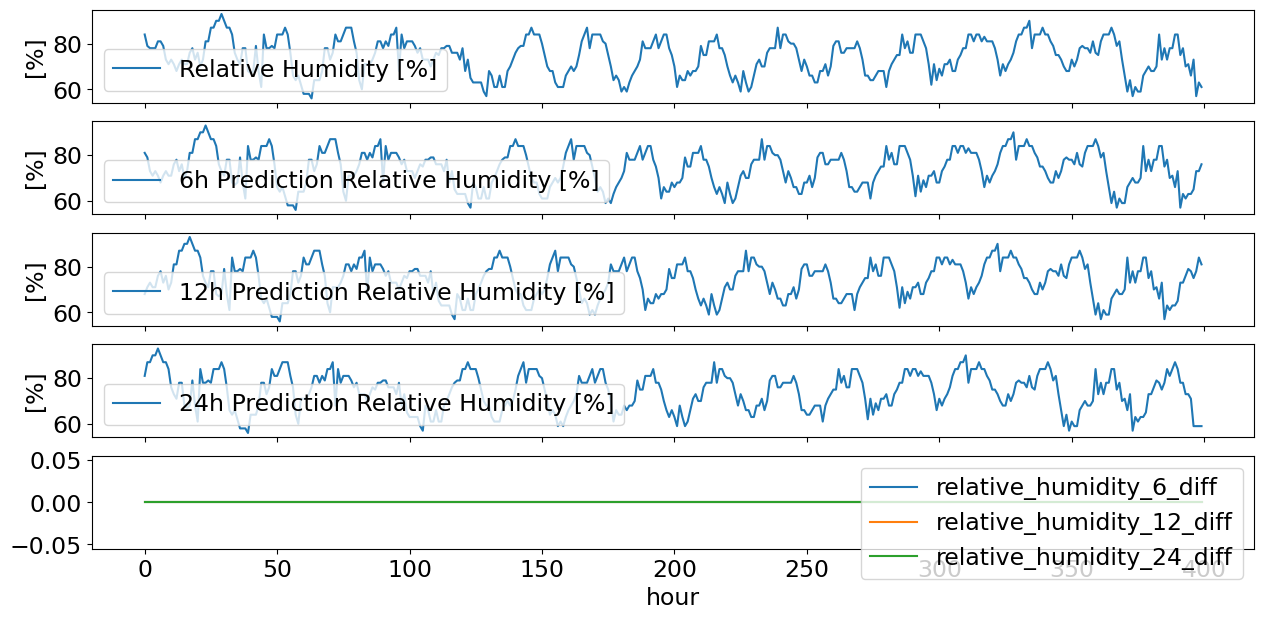

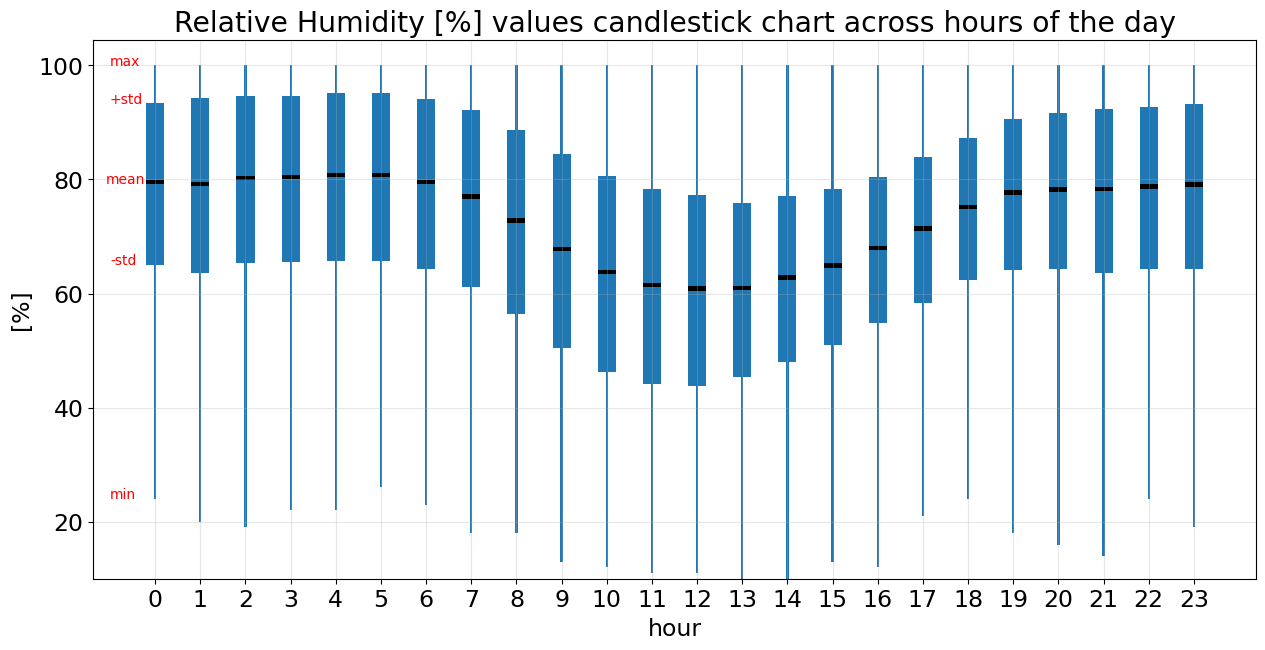

In [22]:
relative_humidity_diffs = compute_diffs(relative_humidity_data)
plot_diffs(relative_humidity_data, relative_humidity_diffs, 
           idx_i=0, idx_f=400, variable_name='relative_humidity')

# compute and plot stats (candlestick chart)
relative_humidity_stats = collect_n_plot_stats(relative_humidity_data, 
                                               ylabel="[%]", savename="relative_humidity_candlestick")

#### Diffuse Solar Radiation [W/m2]

The accuracy of 6h Prediction Diffuse Solar Radiation [W/m2] is 100.0%
The accuracy of 12h Prediction Diffuse Solar Radiation [W/m2] is 100.0%
The accuracy of 24h Prediction Diffuse Solar Radiation [W/m2] is 100.0%


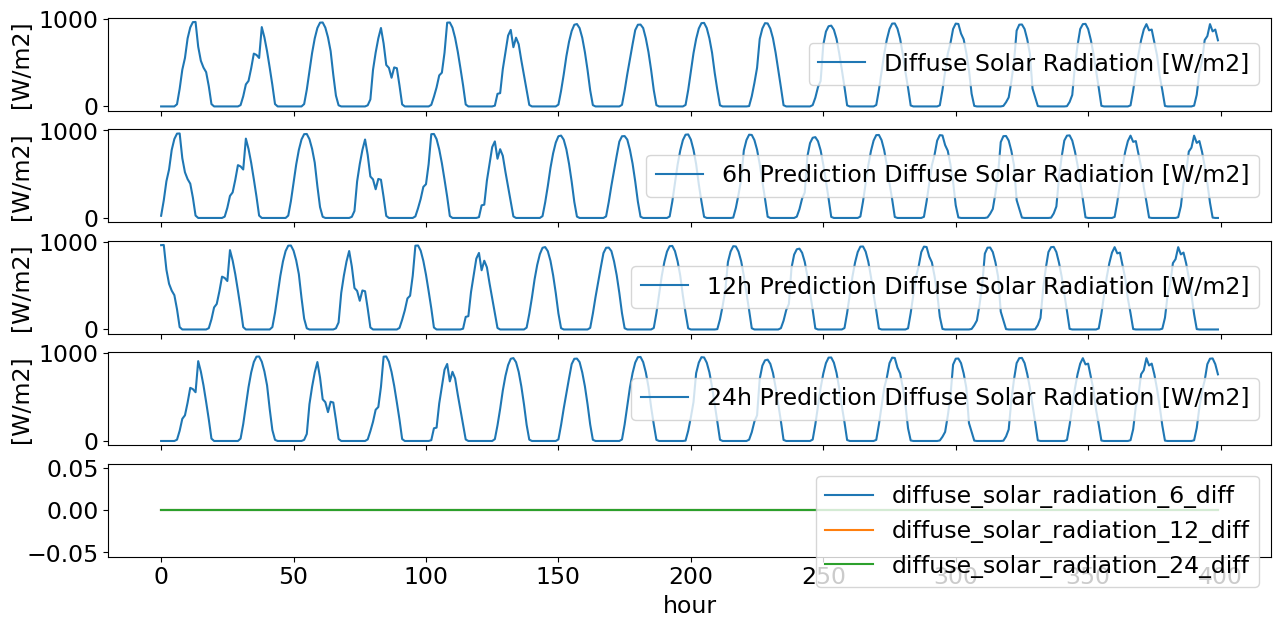

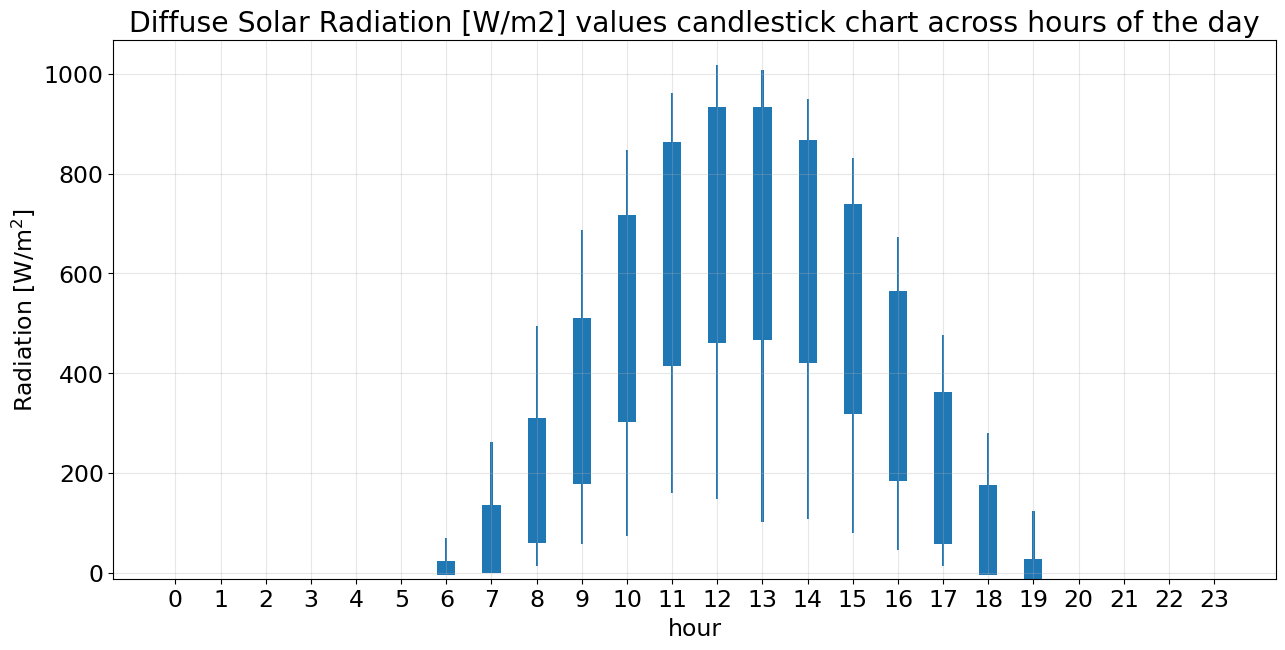

In [23]:
diffuse_solar_radiation_diffs = compute_diffs(diffuse_solar_radiation_data)
plot_diffs(diffuse_solar_radiation_data, diffuse_solar_radiation_diffs, 
           idx_i=0, idx_f=400, variable_name='diffuse_solar_radiation')

# compute and plot stats (candlestick chart)
diffuse_solar_radiation_stats = collect_n_plot_stats(diffuse_solar_radiation_data,
                                                     ylabel="Radiation [W/m$^2$]", 
                                                     savename="diffuse_solar_radiation_candlestick")

#### Direct Solar Radiation [W/m2]

The accuracy of 6h Prediction Direct Solar Radiation [W/m2] is 100.0%
The accuracy of 12h Prediction Direct Solar Radiation [W/m2] is 100.0%
The accuracy of 24h Prediction Direct Solar Radiation [W/m2] is 100.0%


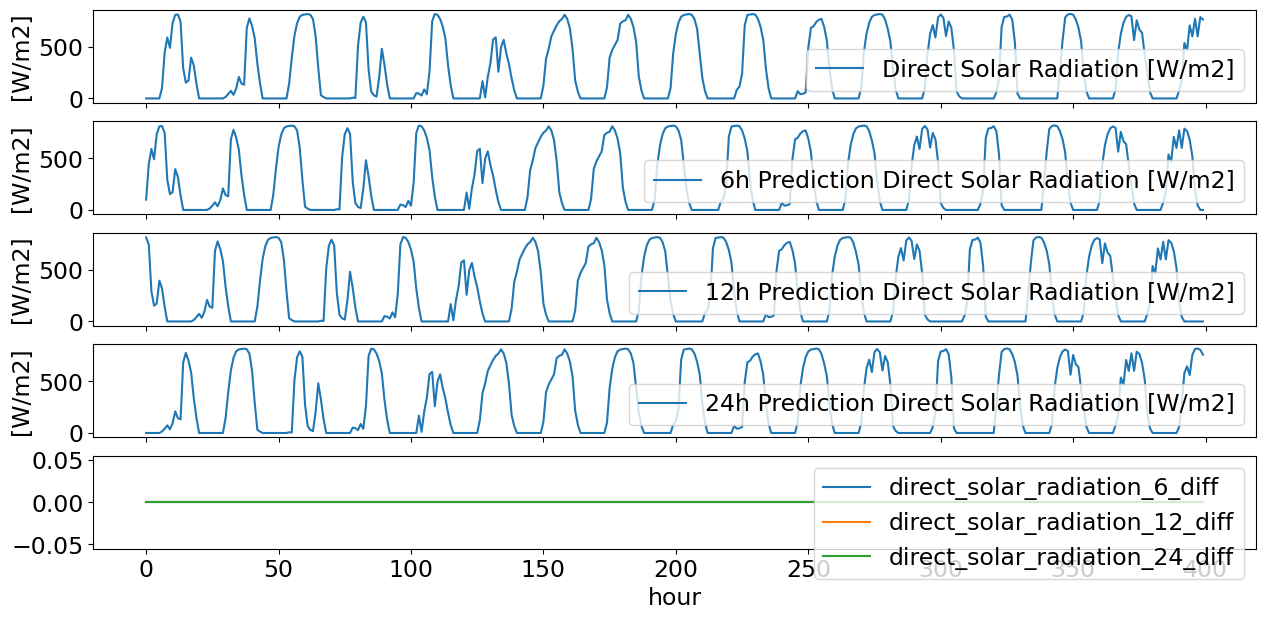

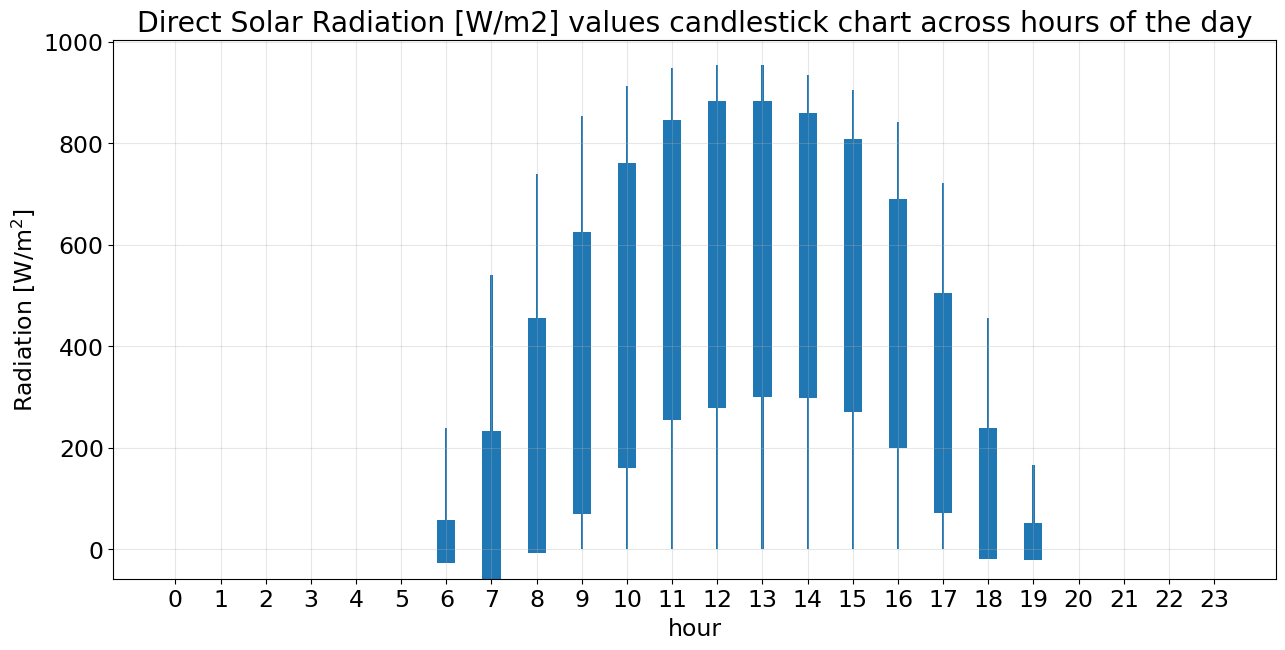

In [24]:
direct_solar_radiation_diffs = compute_diffs(direct_solar_radiation_data)
plot_diffs(direct_solar_radiation_data, direct_solar_radiation_diffs, 
           idx_i=0, idx_f=400, variable_name='direct_solar_radiation')

# compute and plot stats (candlestick chart)
direct_solar_radiation_stats = collect_n_plot_stats(direct_solar_radiation_data,
                                                     ylabel="Radiation [W/m$^2$]", 
                                                     savename="direct_solar_radiation_candlestick")

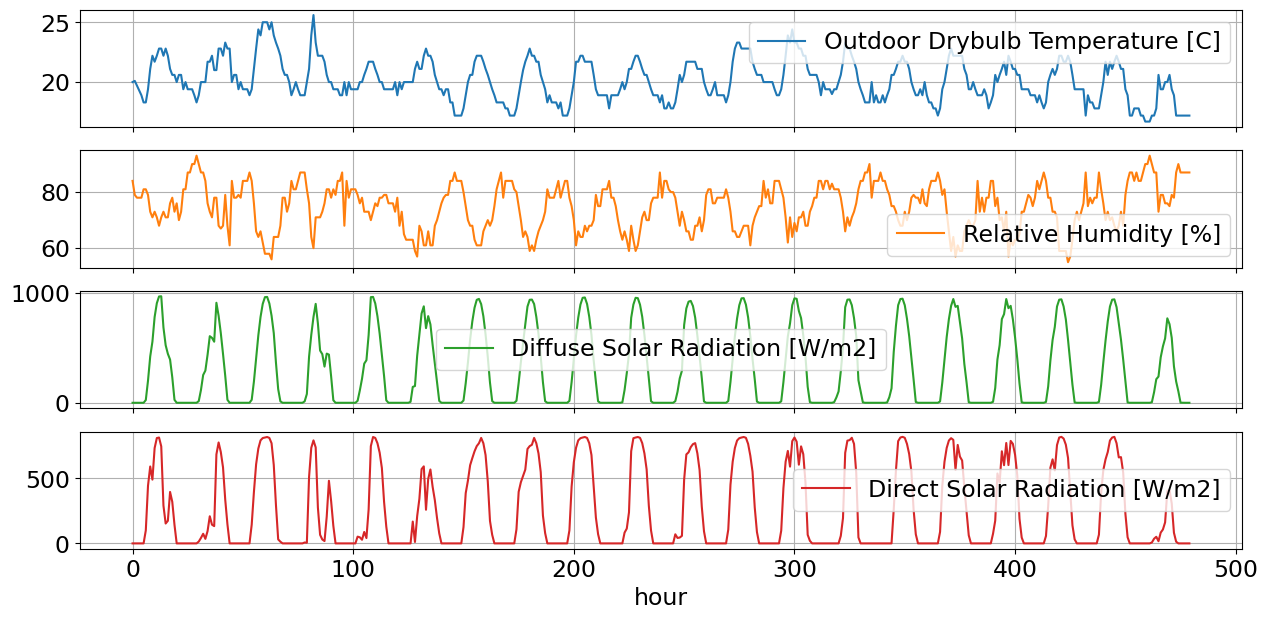

In [25]:
weather[:480].plot(y=["Outdoor Drybulb Temperature [C]", "Relative Humidity [%]", 
                     "Diffuse Solar Radiation [W/m2]", "Direct Solar Radiation [W/m2]"], 
                   subplots=True, xlabel="hour", grid=True)
plt.savefig("figures/statistics/weather_data_480.png")

## Buildings Data

In [26]:
building1 = pd.read_csv(filepath_or_buffer="data/citylearn_challenge_2022_phase_1/Building_1.csv")
building2 = pd.read_csv(filepath_or_buffer="data/citylearn_challenge_2022_phase_1/Building_2.csv")
building3 = pd.read_csv(filepath_or_buffer="data/citylearn_challenge_2022_phase_1/Building_3.csv")
building4 = pd.read_csv(filepath_or_buffer="data/citylearn_challenge_2022_phase_1/Building_4.csv")
building5 = pd.read_csv(filepath_or_buffer="data/citylearn_challenge_2022_phase_1/Building_5.csv")
building1.head()

Month  Hour  Day Type  Daylight Savings Status  Indoor Temperature [C]  \
0    7.0  24.0       7.0                        0                     NaN   
1    8.0   1.0       1.0                        0                     NaN   
2    8.0   2.0       1.0                        0                     NaN   
3    8.0   3.0       1.0                        0                     NaN   
4    8.0   4.0       1.0                        0                     NaN   

   Average Unmet Cooling Setpoint Difference [C]  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   Indoor Relative Humidity [%]  Equipment Electric Power [kWh]  \
0                           NaN                        2.275800   
1                           NaN                        0.851167   
2                           NaN                        0.834600   
3                           NaN                        0.838167   
4                           NaN                        1.478433   

   DHW Heating [kWh]  Cooling Load [kWh]  Heating Load [kWh]  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   
3                  0                   0                   0   
4                  0                   0                   0   

   Solar Generation [W/kW]  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

In [27]:
for i, s in enumerate(building1.columns):
    print(i, ":", s)

0 : Month
1 : Hour
2 : Day Type
3 : Daylight Savings Status
4 : Indoor Temperature [C]
5 : Average Unmet Cooling Setpoint Difference [C]
6 : Indoor Relative Humidity [%]
7 : Equipment Electric Power [kWh]
8 : DHW Heating [kWh]
9 : Cooling Load [kWh]
10 : Heating Load [kWh]
11 : Solar Generation [W/kW]


In [28]:
building1 = building1[["Month", "Hour", "Day Type", "Equipment Electric Power [kWh]", "Solar Generation [W/kW]"]]
building2 = building2[["Month", "Hour", "Day Type", "Equipment Electric Power [kWh]", "Solar Generation [W/kW]"]]
building3 = building3[["Month", "Hour", "Day Type", "Equipment Electric Power [kWh]", "Solar Generation [W/kW]"]]
building4 = building4[["Month", "Hour", "Day Type", "Equipment Electric Power [kWh]", "Solar Generation [W/kW]"]]
building5 = building5[["Month", "Hour", "Day Type", "Equipment Electric Power [kWh]", "Solar Generation [W/kW]"]]

<AxesSubplot:xlabel='Month', ylabel='Equipment Electric Power [kWh]'>

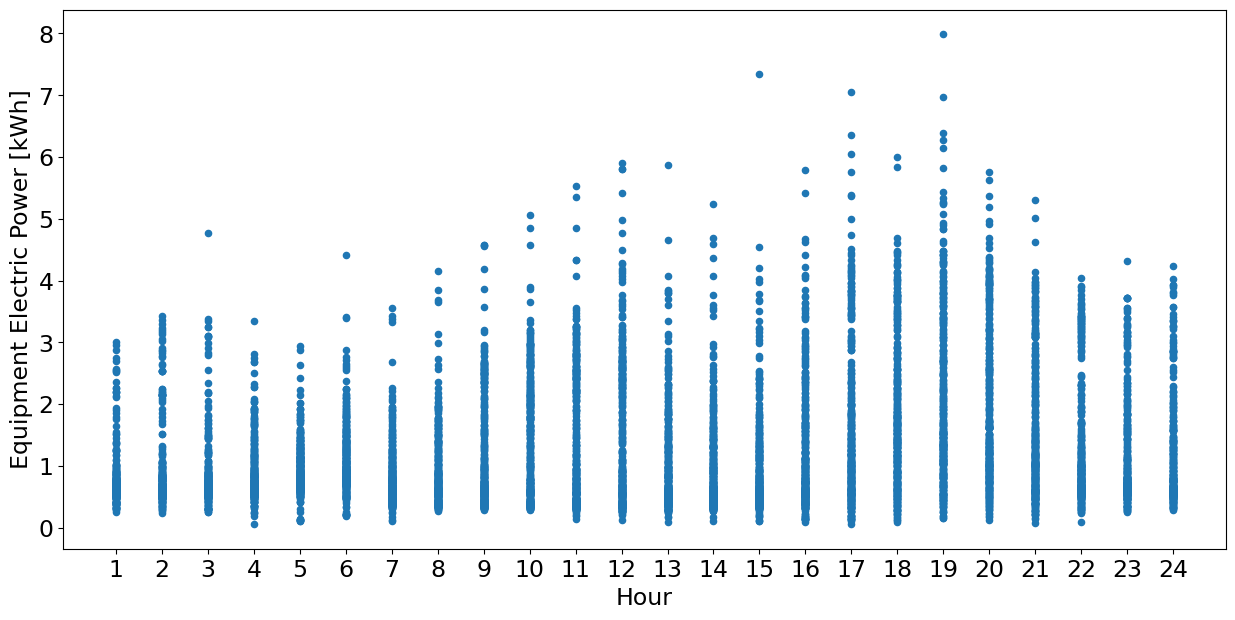

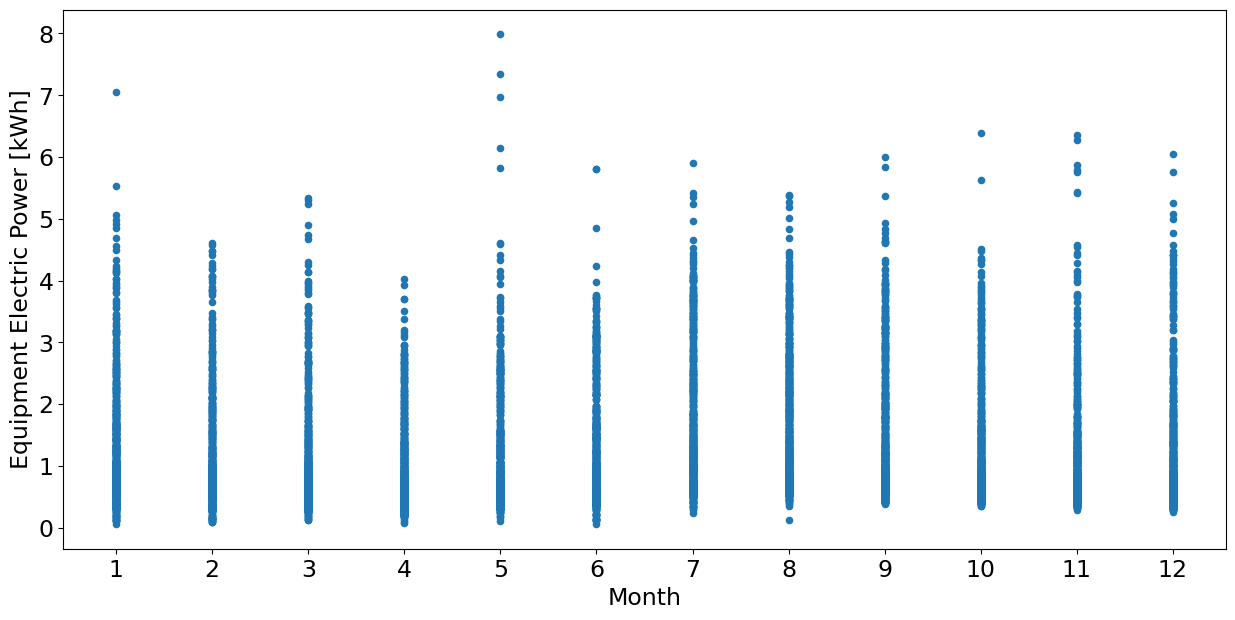

In [29]:
building1.plot(x="Hour", y="Equipment Electric Power [kWh]", kind="scatter", xticks=np.unique(building1["Hour"].values))
building1.plot(x="Month", y="Equipment Electric Power [kWh]", kind="scatter", xticks=np.unique(building1["Month"].values))

<AxesSubplot:xlabel='Month', ylabel='Solar Generation [W/kW]'>

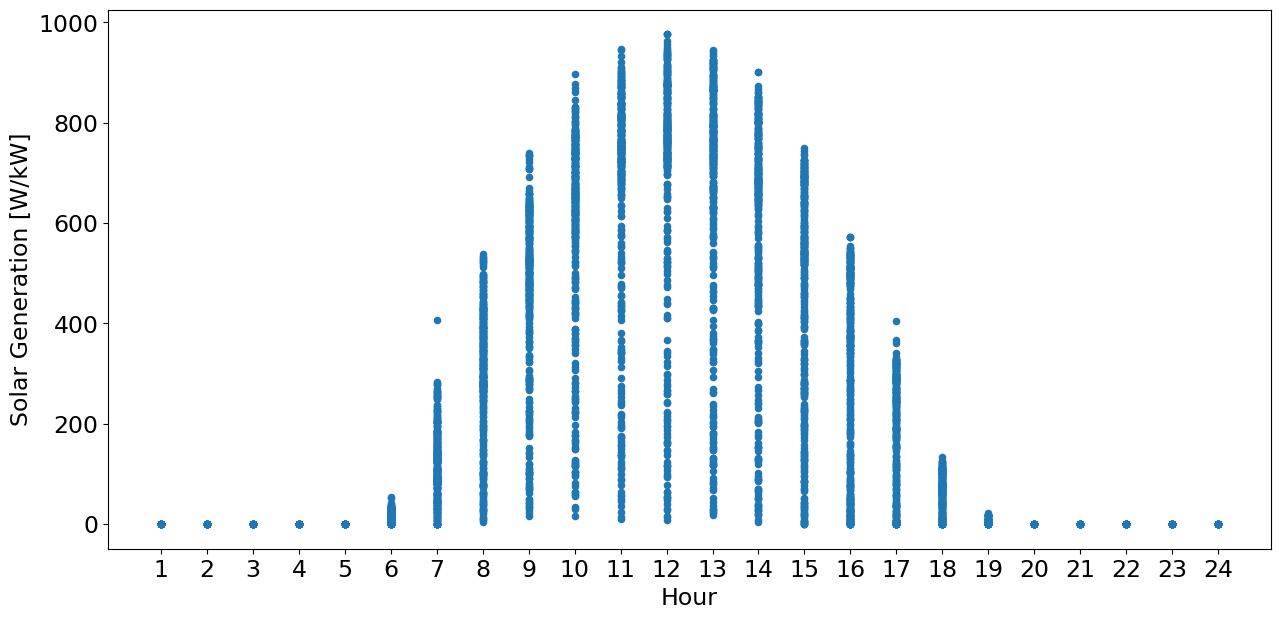

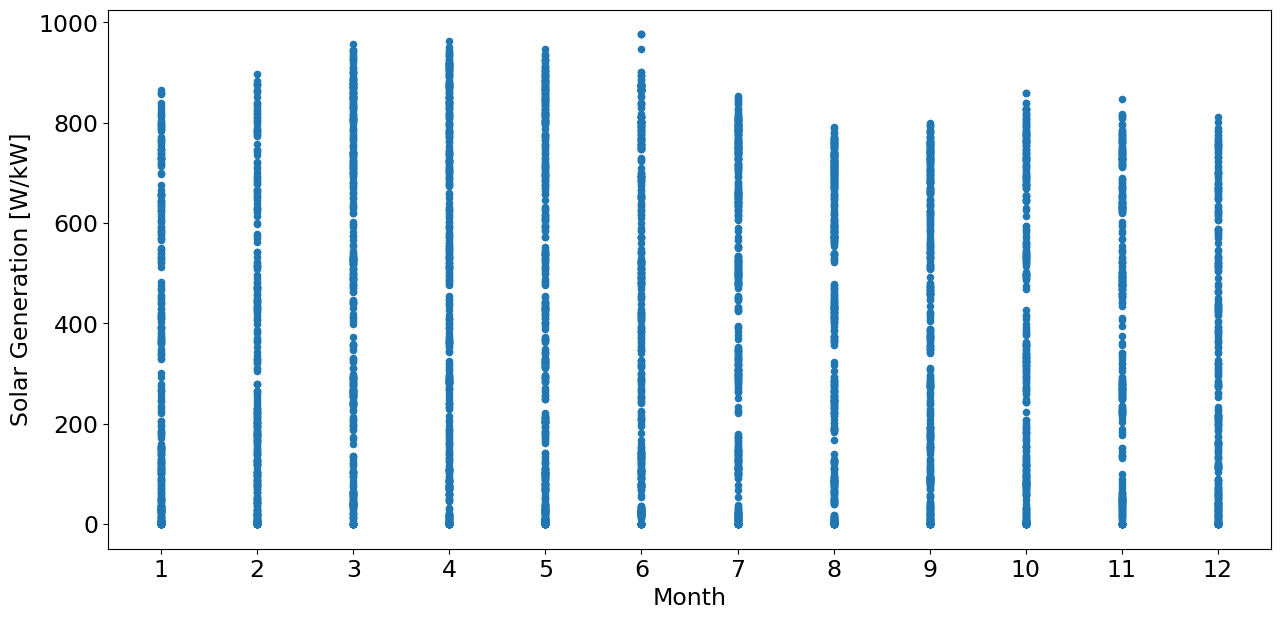

In [30]:
building1.plot(x="Hour", y="Solar Generation [W/kW]", kind="scatter", xticks=np.unique(building1["Hour"].values))
building1.plot(x="Month", y="Solar Generation [W/kW]", kind="scatter", xticks=np.unique(building1["Month"].values))

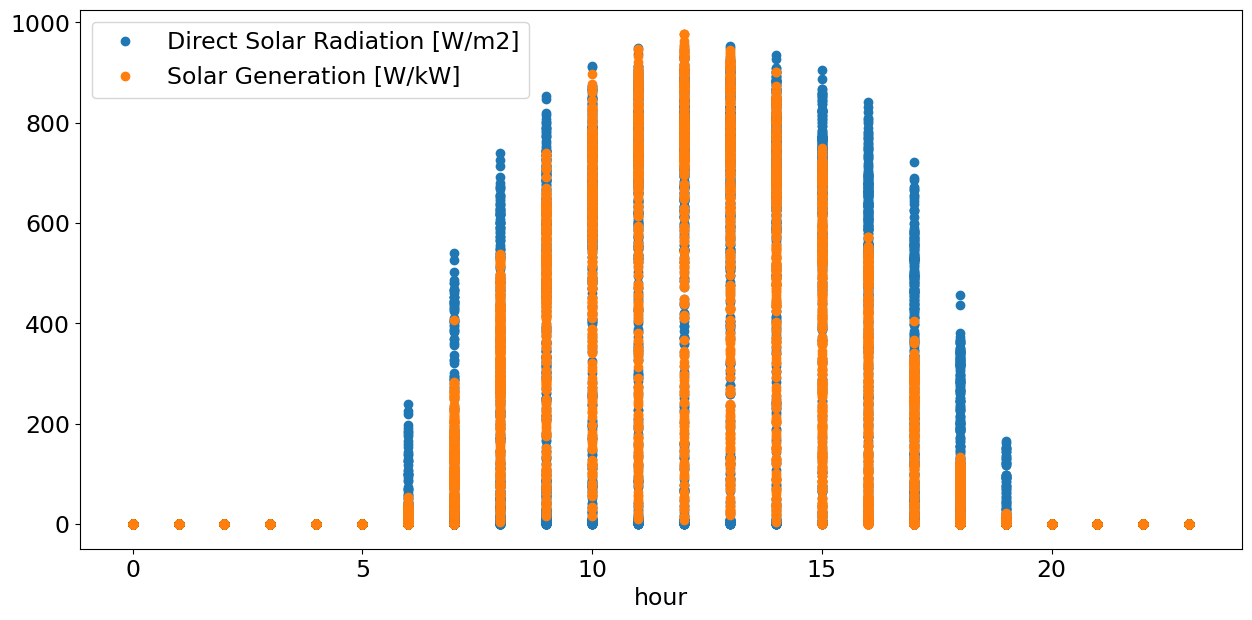

In [31]:
plt.figure()
hours_day = np.mod(np.arange(building1.index.stop), 24)
plt.plot(hours_day, direct_solar_radiation_data["Direct Solar Radiation [W/m2]"], 'o', label="Direct Solar Radiation [W/m2]")
plt.plot(hours_day, building1["Solar Generation [W/kW]"], 'o', label="Solar Generation [W/kW]")
plt.legend()
plt.xlabel("hour")
plt.show()

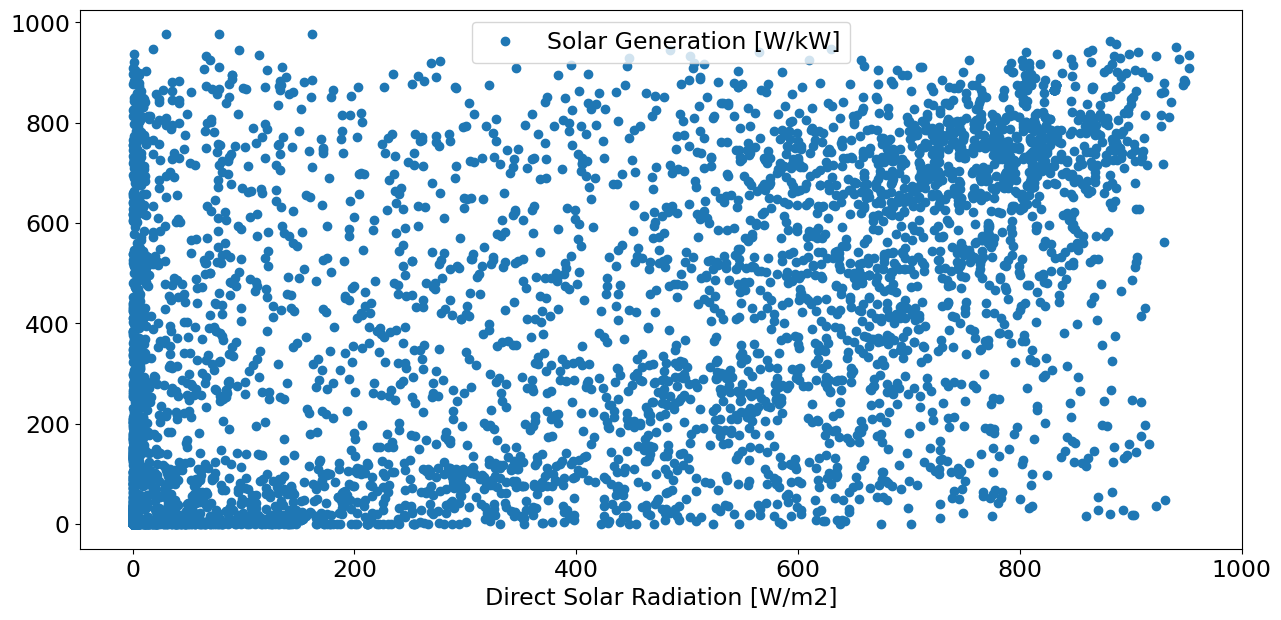

In [32]:
plt.figure()
plt.plot(direct_solar_radiation_data["Direct Solar Radiation [W/m2]"], building1["Solar Generation [W/kW]"], 'o', label="Solar Generation [W/kW]")
plt.legend()
plt.xlabel("Direct Solar Radiation [W/m2]")
plt.show()

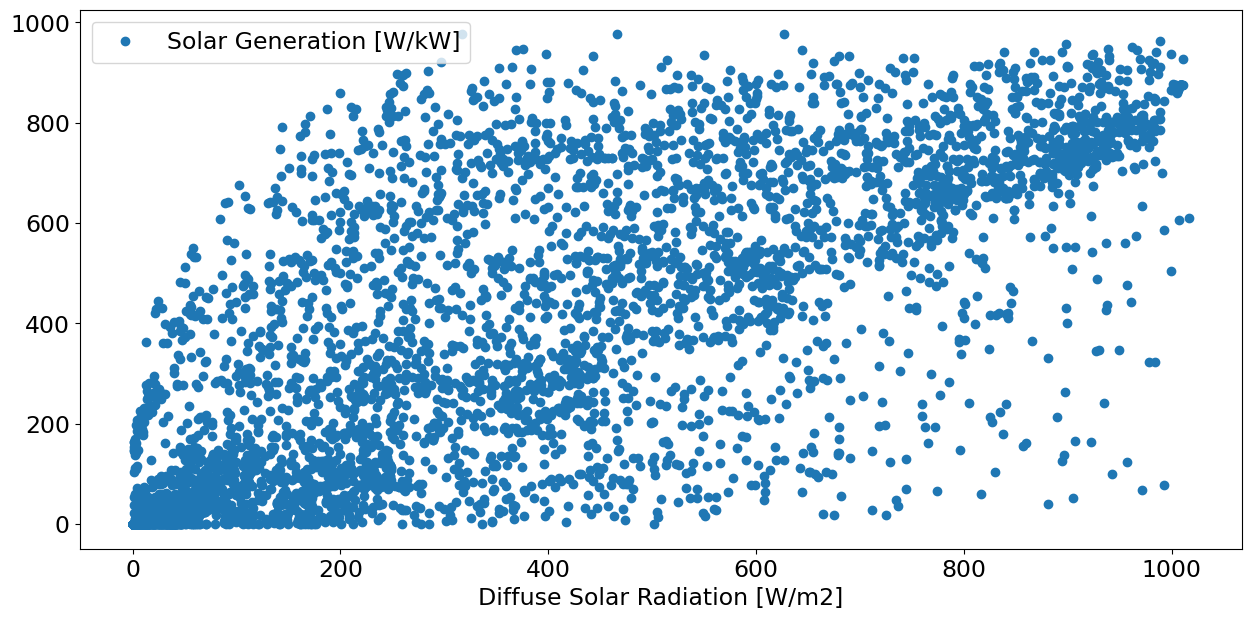

In [33]:
plt.figure()
plt.plot(diffuse_solar_radiation_data["Diffuse Solar Radiation [W/m2]"], building1["Solar Generation [W/kW]"], 'o', label="Solar Generation [W/kW]")
plt.legend()
plt.xlabel("Diffuse Solar Radiation [W/m2]")
plt.show()

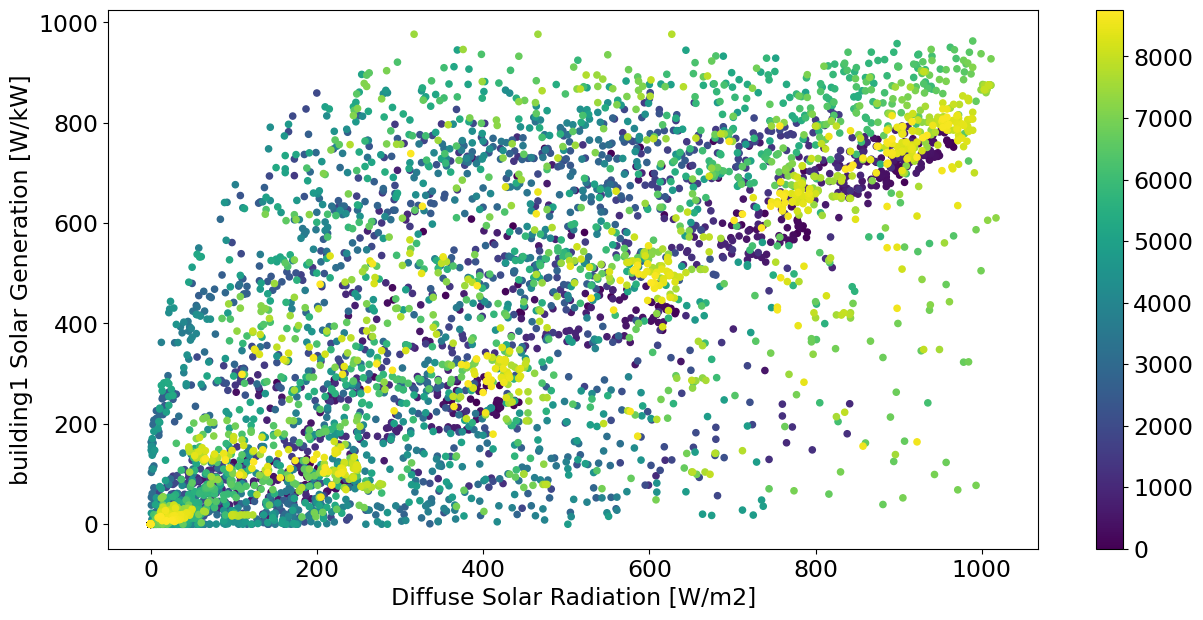

In [34]:
plt.figure()
plt.scatter(diffuse_solar_radiation_data["Diffuse Solar Radiation [W/m2]"], building1["Solar Generation [W/kW]"], 20, np.arange(8760))
plt.xlabel("Diffuse Solar Radiation [W/m2]")
plt.ylabel("building1 Solar Generation [W/kW]")
plt.colorbar()
plt.show()

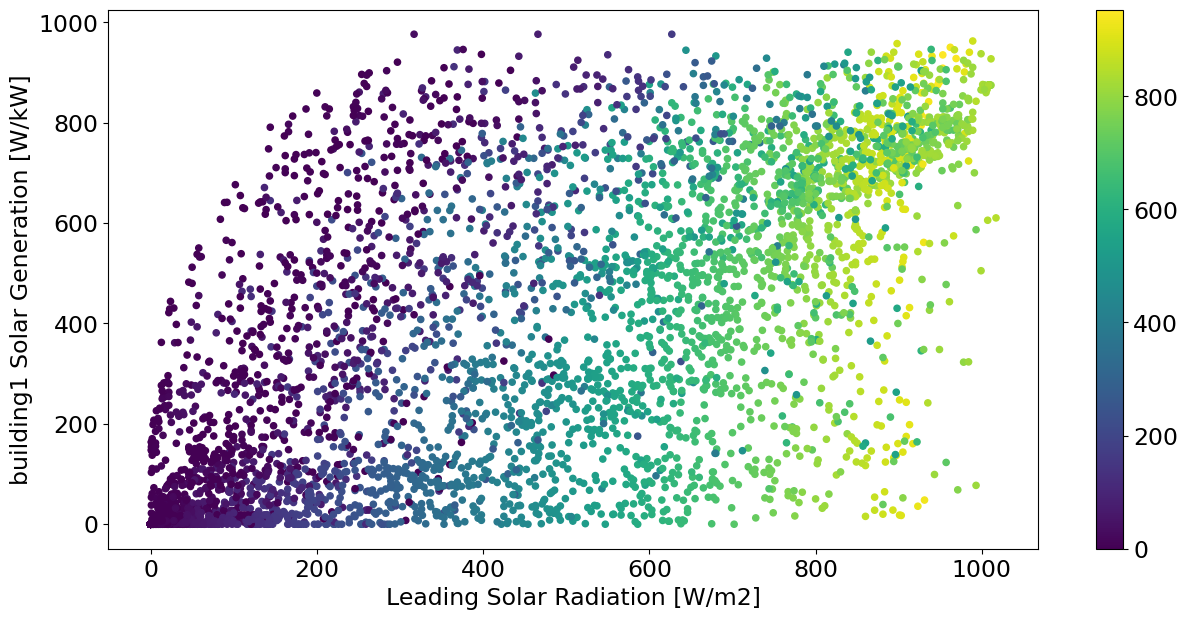

In [35]:
plt.figure()
plt.scatter(np.maximum(diffuse_solar_radiation_data["Diffuse Solar Radiation [W/m2]"].values, direct_solar_radiation_data["Direct Solar Radiation [W/m2]"].values), building1["Solar Generation [W/kW]"], 20, direct_solar_radiation_data["Direct Solar Radiation [W/m2]"])
plt.xlabel("Leading Solar Radiation [W/m2]")
plt.ylabel("building1 Solar Generation [W/kW]")
plt.colorbar()
plt.show()

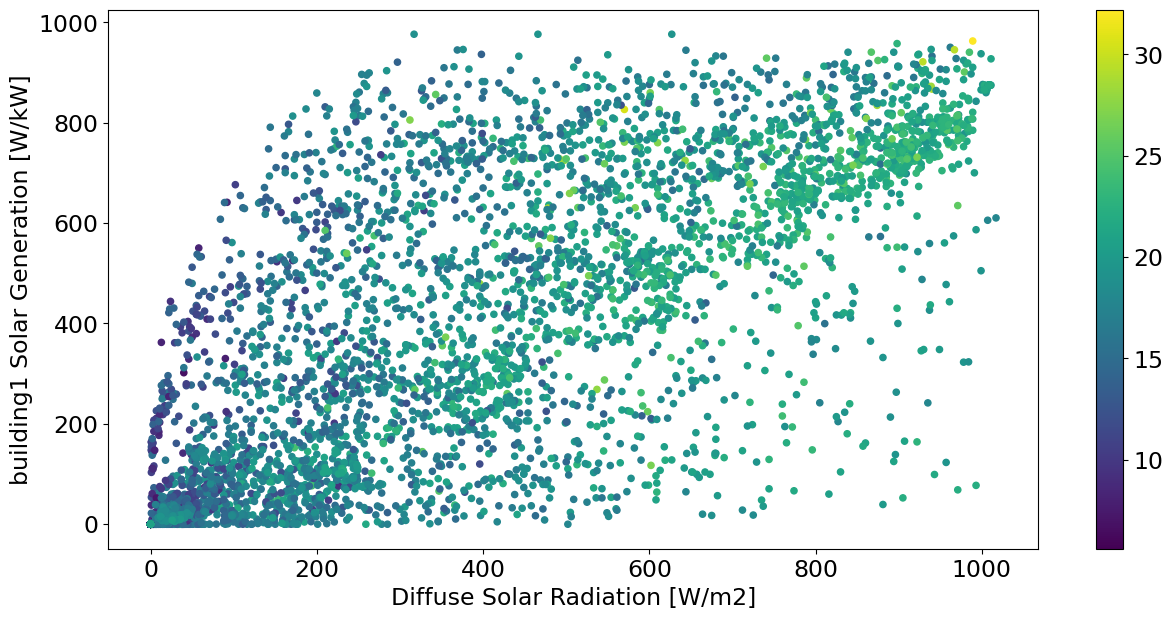

In [36]:
plt.figure()
plt.scatter(diffuse_solar_radiation_data["Diffuse Solar Radiation [W/m2]"], building1["Solar Generation [W/kW]"], 20, outdoor_drybulb_temperature_data["Outdoor Drybulb Temperature [C]"])
plt.xlabel("Diffuse Solar Radiation [W/m2]")
plt.ylabel("building1 Solar Generation [W/kW]")
plt.colorbar()
plt.show()

In [37]:
plt.figure()
plt.scatter(diffuse_solar_radiation_data["Diffuse Solar Radiation [W/m2]"], building4["Solar Generation [W/kW]"], 20, temprature_data["Temprature [C]"])
plt.xlabel("Diffuse Solar Radiation [W/m2]")
plt.ylabel("building1 Solar Generation [W/kW]")
plt.colorbar()
plt.show()

NameError: name 'temprature_data' is not defined

<Figure size 1500x700 with 0 Axes>

In [ ]:
plt.figure()
plt.scatter(direct_solar_radiation_data["Direct Solar Radiation [W/m2]"], building2["Solar Generation [W/kW]"], 20, relative_humidity_data["Relative Humidity [%]"])
plt.xlabel("Direct Solar Radiation [W/m2]")
plt.ylabel("building1 Solar Generation [W/kW]")
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.scatter(relative_humidity_data["Relative Humidity [%]"],outdoor_drybulb_temperature_data["Outdoor Drybulb Temperature [C]"])
plt.xlabel("Relative Humidity [%]")
plt.ylabel("Outdoor Drybulb Temperature [C]")
plt.show()

In [ ]:
plt.figure()
plt.scatter(relative_humidity_data["Relative Humidity [%]"],(relative_humidity_data["Relative Humidity [%]"]**(1/3))*outdoor_drybulb_temperature_data["Outdoor Drybulb Temperature [C]"])
plt.xlabel("Relative Humidity [%]")
plt.ylabel("Outdoor Drybulb Temperature [C]")
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.scatter(diffuse_solar_radiation_data["Diffuse Solar Radiation [W/m2]"], building5["Solar Generation [W/kW]"], 20, (relative_humidity_data["Relative Humidity [%]"]**(1/3))*outdoor_drybulb_temperature_data["Outdoor Drybulb Temperature [C]"])
plt.xlabel("Diffuse Solar Radiation [W/m2]")
plt.ylabel("building1 Solar Generation [W/kW]")
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.scatter(diffuse_solar_radiation_data["Diffuse Solar Radiation [W/m2]"], direct_solar_radiation_data["Direct Solar Radiation [W/m2]"])
plt.xlabel("Difuse Solar Radiation [W/m2]")
plt.ylabel("Direct Solar Radiation [W/m2]")
plt.show()

In [ ]:
plt.figure()
plt.scatter(direct_solar_radiation_data["Direct Solar Radiation [W/m2]"], building1["Solar Generation [W/kW]"], 20, (relative_humidity_data["Relative Humidity [%]"]**(1/3))*outdoor_drybulb_temperature_data["Outdoor Drybulb Temperature [C]"])
plt.xlabel("Direct Solar Radiation [W/m2]")
plt.ylabel("building1 Solar Generation [W/kW]")
plt.colorbar()
plt.show()

In [39]:
building1.sum()


Month                             5.716800e+04
Hour                              1.095000e+05
Day Type                          3.497400e+04
Equipment Electric Power [kWh]    1.058335e+04
Solar Generation [W/kW]           1.803124e+06
dtype: float64